# Tarea: Ensayo sobre regresión lineal
## Presentado por: Miguel De Souza

### Referencias

1. [Regresión lineal de Wikipedia](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal)

2. [Linear Regresion Tutorial. 365datascience](https://365datascience.com/tutorials/python-tutorials/linear-regression/)

In [2]:
#Packages for importing images from internet
from IPython.display import Image
from IPython.core.display import HTML 

In [3]:
#Packages to use for homework
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Introducción:

#### Regresión lineal: 
Una regresión lineal es un modelo matemático que se usa para dar una aproximación lineal de una variable dependiente (comúnmente denominada $Y$) con un conjunto de variables independientes (comúnmente denominadas $X_i$). Tal modelo se puede escribir como:

$$Y = \beta_0 + \beta_1X_1 + ... + \beta_mX_m + \epsilon$$

donde:

$Y$: variable dependiente.

$X_1,...X_m$: variables independientes.

$\beta_0,...\beta_m$: parámetros del modelo.

$\epsilon$: error aleatorio.

Un esquema de lo anteriormente dicho para una variable independiente (regresión lineal simple) aparece en la siguiente imagen:

In [5]:
Image(url= "https://365datascience.com/resources/blog/2018-11-image28-1024x541.jpg",width=600, height=600)

### Datos reales

Los datos reales con los que se va a trabajar se consiguieron en la referencia 2. escrita al principio de este archivo. Estos datos provienen de 84 estudiantes de Estados Unidos. Una breve descripción de estos datos se puede ver en la siguiente celda, donde se importan y se visualiza un resumen de la información que se tiene:

In [13]:
#Reading and describing real data
data = pd.read_csv('1.01. Simple linear regression.csv')
###data
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


### Planteamiento del problema
La variable independiente en nuestro problema se denomina como SAT ($X$). Haciendo un equivalente para Colombia, el SAT sería como el examen SABER 11 ya que este examen es un requisito para estudiar en una universidad, y en algunas universidades se pide y se usa como filtro de admisión.

La variable dependiente es el GPA ($Y$) cuyo equivalente en Colombia es el promedio académico (de notas) que un estudiante obtuvo a lo largo de su carrera universitaria. 

La idea del problema es predecir como será el GPA basado en los resultados del examen SAT realizado antes de ingresar a la universidad. Esto se hace ya que se puede pensar que entre mejor le vaya a un estudiante en su examen SAT (o en el SABER 11 en Colombia) es más probable que tenga un mejor promedio académico (reflejado en el GPA) en su carrera, pues tendría mejores conocimientos básicos que estudiantes con baja calificación en el SAT. Toda esta situación se presenta de forma esquematizada en la siguiente imagen:

<img src="SAT_GPA.png">

A continuación se hace el análisis matemático, el cual se explica en los comentarios de cada celda. Por buenas costumbres de proramación, todo se hace en idioma inglés:


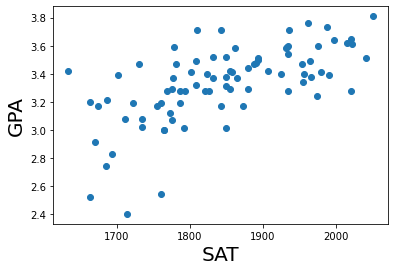

In [18]:
#Creating dependent and independent variables
y = data['GPA']
x1 = data['SAT']

#Plotting data
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Como se puede ver en la gráfica anterior, parece haber una tendencia entre el GPA y el SAT. El modelo a implementar será el siguiente:
$$\hat{y} = \beta_0 + \beta_1x_1$$

donde $\hat{y}$ es el estimador de la variable $y$. Otra forma de escribir esto y que facilitará la comprensión del código es la siguiente:

\begin{equation}
\hat{y} = \beta_0 + \beta_1x_1 \\
        = \beta_0*1 + \beta_1x_1
\end{equation}

este $1$ que multiplica al parámetro $\beta_0$ se añade con la función $\textit{sm.add_constant()}$, y teniendo las variables independientes de $x_1$ y $1$ entonces se procede a usar la función $OLS()$ (ordinary least squares, es decir la función de mínimos cuadrados) y a graficar el mejor ajuste lineal a los datos (es decir el arrojado usando mínimos cuadrados):

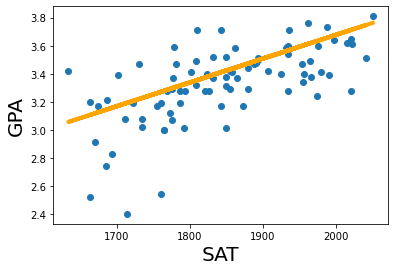

In [28]:
#adding '1' constant:
x = sm.add_constant(x1)
#print(x)

#ordinary least squares regresion:
results = sm.OLS(y,x).fit()
results.summary()

#Plotting
plt.scatter(x1,y)
yhat = 0.0017*x1+0.278 #These quoeficients were checked with results.summary()
fig = plt.plot(x1, yhat, lw=4, c='orange', label='linear regression')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

## Conclusiones:
1. Aunque a simple vista el GPA parece ser una función creciente de SAT, los datos tienen mucha dispersión y por lo tanto no se puede concluir aún que una regresión lineal es el mejor ajuste a los datos.
2. Como consecuencia de la conclusión 1. se puede decir que este problema queda abierto para buscar otro tipo de regresión que ajuste mejor los datos, o procurar recolectar mas datos para ver si estos se ajustan a una regresión lineal.